

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Image Comparison Workflow

#### Ahmed Merzoug, Graduate Student
#### Petroleum and Geosystem Engineering, University of Texas at Austin 

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Lei Liu, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/leiliu96/)


## Executive Summary

This Jupyter notebook outlines a workflow designed to compare two sets of images:

1. **Sequential Gaussian Simulation (SGS) Images**: These images have been generated using the Sequential Gaussian Simulation technique, a geostatistical method used to model spatial uncertainty.

2. **WGAN-GP Generated Images**: These images have been produced by a Wasserstein Generative Adversarial Network with Gradient Penalty (WGAN-GP), which is a state-of-the-art generative model known for its stability and quality of generated images.

The comparison is based on multiple analytical approaches, including:

- **Dimensionality Reduction**: Techniques such as Pricnipal Component Analysis (PCA), t-distributed stochastic neighbor embedding (t-SNE), Uniform Manifold Approximation and Projection (UMAP), and Multi-Dimensional Scaling (MDS) are used to visualize the similarities and differences between the images in a lower-dimensional space. This is useful for understanding the overarching patterns in the data.

- **Statistical Approaches**: We employ statistical measures to compare images. This may include comparing distributions of pixel values or using more complex image comparison metrics (SSIM, Covariance, Summary Statistics). 

The goal of this workflow is to provide a comprehensive understanding of how the images from the two different generation techniques compare to each other, both visually and statistically. This could inform decisions on which method to use for image generation based on the needs of the application (e.g., realism, variability, computational efficiency).


By the end of this workflow, we should have a clearer picture of the strengths and weaknesses of each image generation technique, as evidenced by their respective outputs.


In [1]:
#Importing Libraries
import os
from skimage import io
from skimage.metrics import structural_similarity as ssim
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from ipywidgets import interactive, IntSlider, FloatSlider, Output, VBox
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap.umap_ as umap
import seaborn as sns
import warnings
import requests
import pandas as pd


In [2]:

# Raw GitHub URL of the npz file
raw_url = 'https://raw.githubusercontent.com/AhmedMerz/Dataset/main/combined_data.npz'

# Download the file content
response = requests.get(raw_url)
if response.status_code == 200:
    with open('downloaded_data.npz', 'wb') as f:
        f.write(response.content)

# Load the downloaded file
loaded_data = np.load('downloaded_data.npz')

# Access the arrays and check their shapes
data1 = loaded_data['data1']
data2 = loaded_data['data2'].squeeze()


### Plot the different Images (Trainng and Generated)

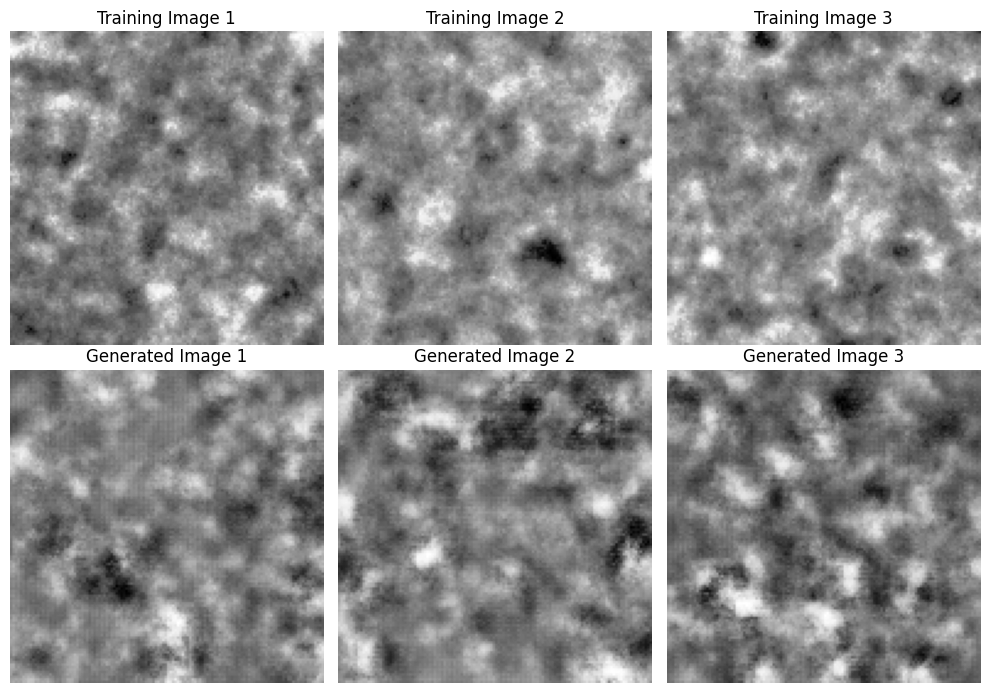

In [3]:
# Plotting 3 training images and 3 generated images
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

# Plot training images
for i in range(3):
    axes[0, i].imshow(data1[i], cmap='gray')
    axes[0, i].set_title(f'Training Image {i+1}')
    axes[0, i].axis('off')

# Plot generated images
for i in range(3):
    axes[1, i].imshow(data2[i], cmap='gray')
    axes[1, i].set_title(f'Generated Image {i+1}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

## MDS Workflow Steps

1. **Data Loading**: Load the image data from both generation techniques.

2. **Preprocessing**: Flatten the images into vectors for analysis and combine the data into a single matrix.

3. **Dimensionality Reduction Analysis**:
    - Perform MDS with various distance metrics to visualize the data in two dimensions.
    - Include both metric and non-metric MDS to explore different aspects of the data structure.


## Metric MDS

In metric MDS, distances in the reduced dimensionality should be as close as possible to the actual dissimilarities. Here are some common distance metrics:

**Euclidean Distance**: The straight-line distance between two points in Euclidean space.

$$ d_{ij} = \sqrt{\sum_{k=1}^n (x_{ik} - x_{jk})^2} $$

**Manhattan Distance**: The sum of the absolute differences of their Cartesian coordinates.

$$ d_{ij} = \sum_{k=1}^n |x_{ik} - x_{jk}| $$

**Chebyshev Distance**: The maximum absolute distance along any coordinate dimension.

$$ d_{ij} = \max_k |x_{ik} - x_{jk}| $$

**Minkowski Distance**: A generalization of other distances, which becomes the Euclidean distance for p=2 and Manhattan distance for p=1.

$$ d_{ij} = \left(\sum_{k=1}^n |x_{ik} - x_{jk}|^p\right)^{1/p} $$

## Non-Metric MDS

Non-metric MDS focuses on preserving the rank order of the dissimilarities. It uses a stress function to measure the fit between distances in reduced dimensions and the ranks of the original dissimilarities. The stress function $\sigma$ is minimized during the optimization and is defined as:

$$ \sigma = \sqrt{\frac{\sum_{i<j} (d_{ij} - d'_{ij})^2}{\sum_{i<j} d_{ij}^2}} $$

Here, $d_{ij}$ are the dissimilarities in the original space, and $d'_{ij}$ are the disparities in the low-dimensional space. Non-metric MDS seeks a configuration where disparities preserve the rank order of the original dissimilarities.


c:\ProgramData\Anaconda3\envs\Torch\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\Torch\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\Torch\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\Torch\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppres

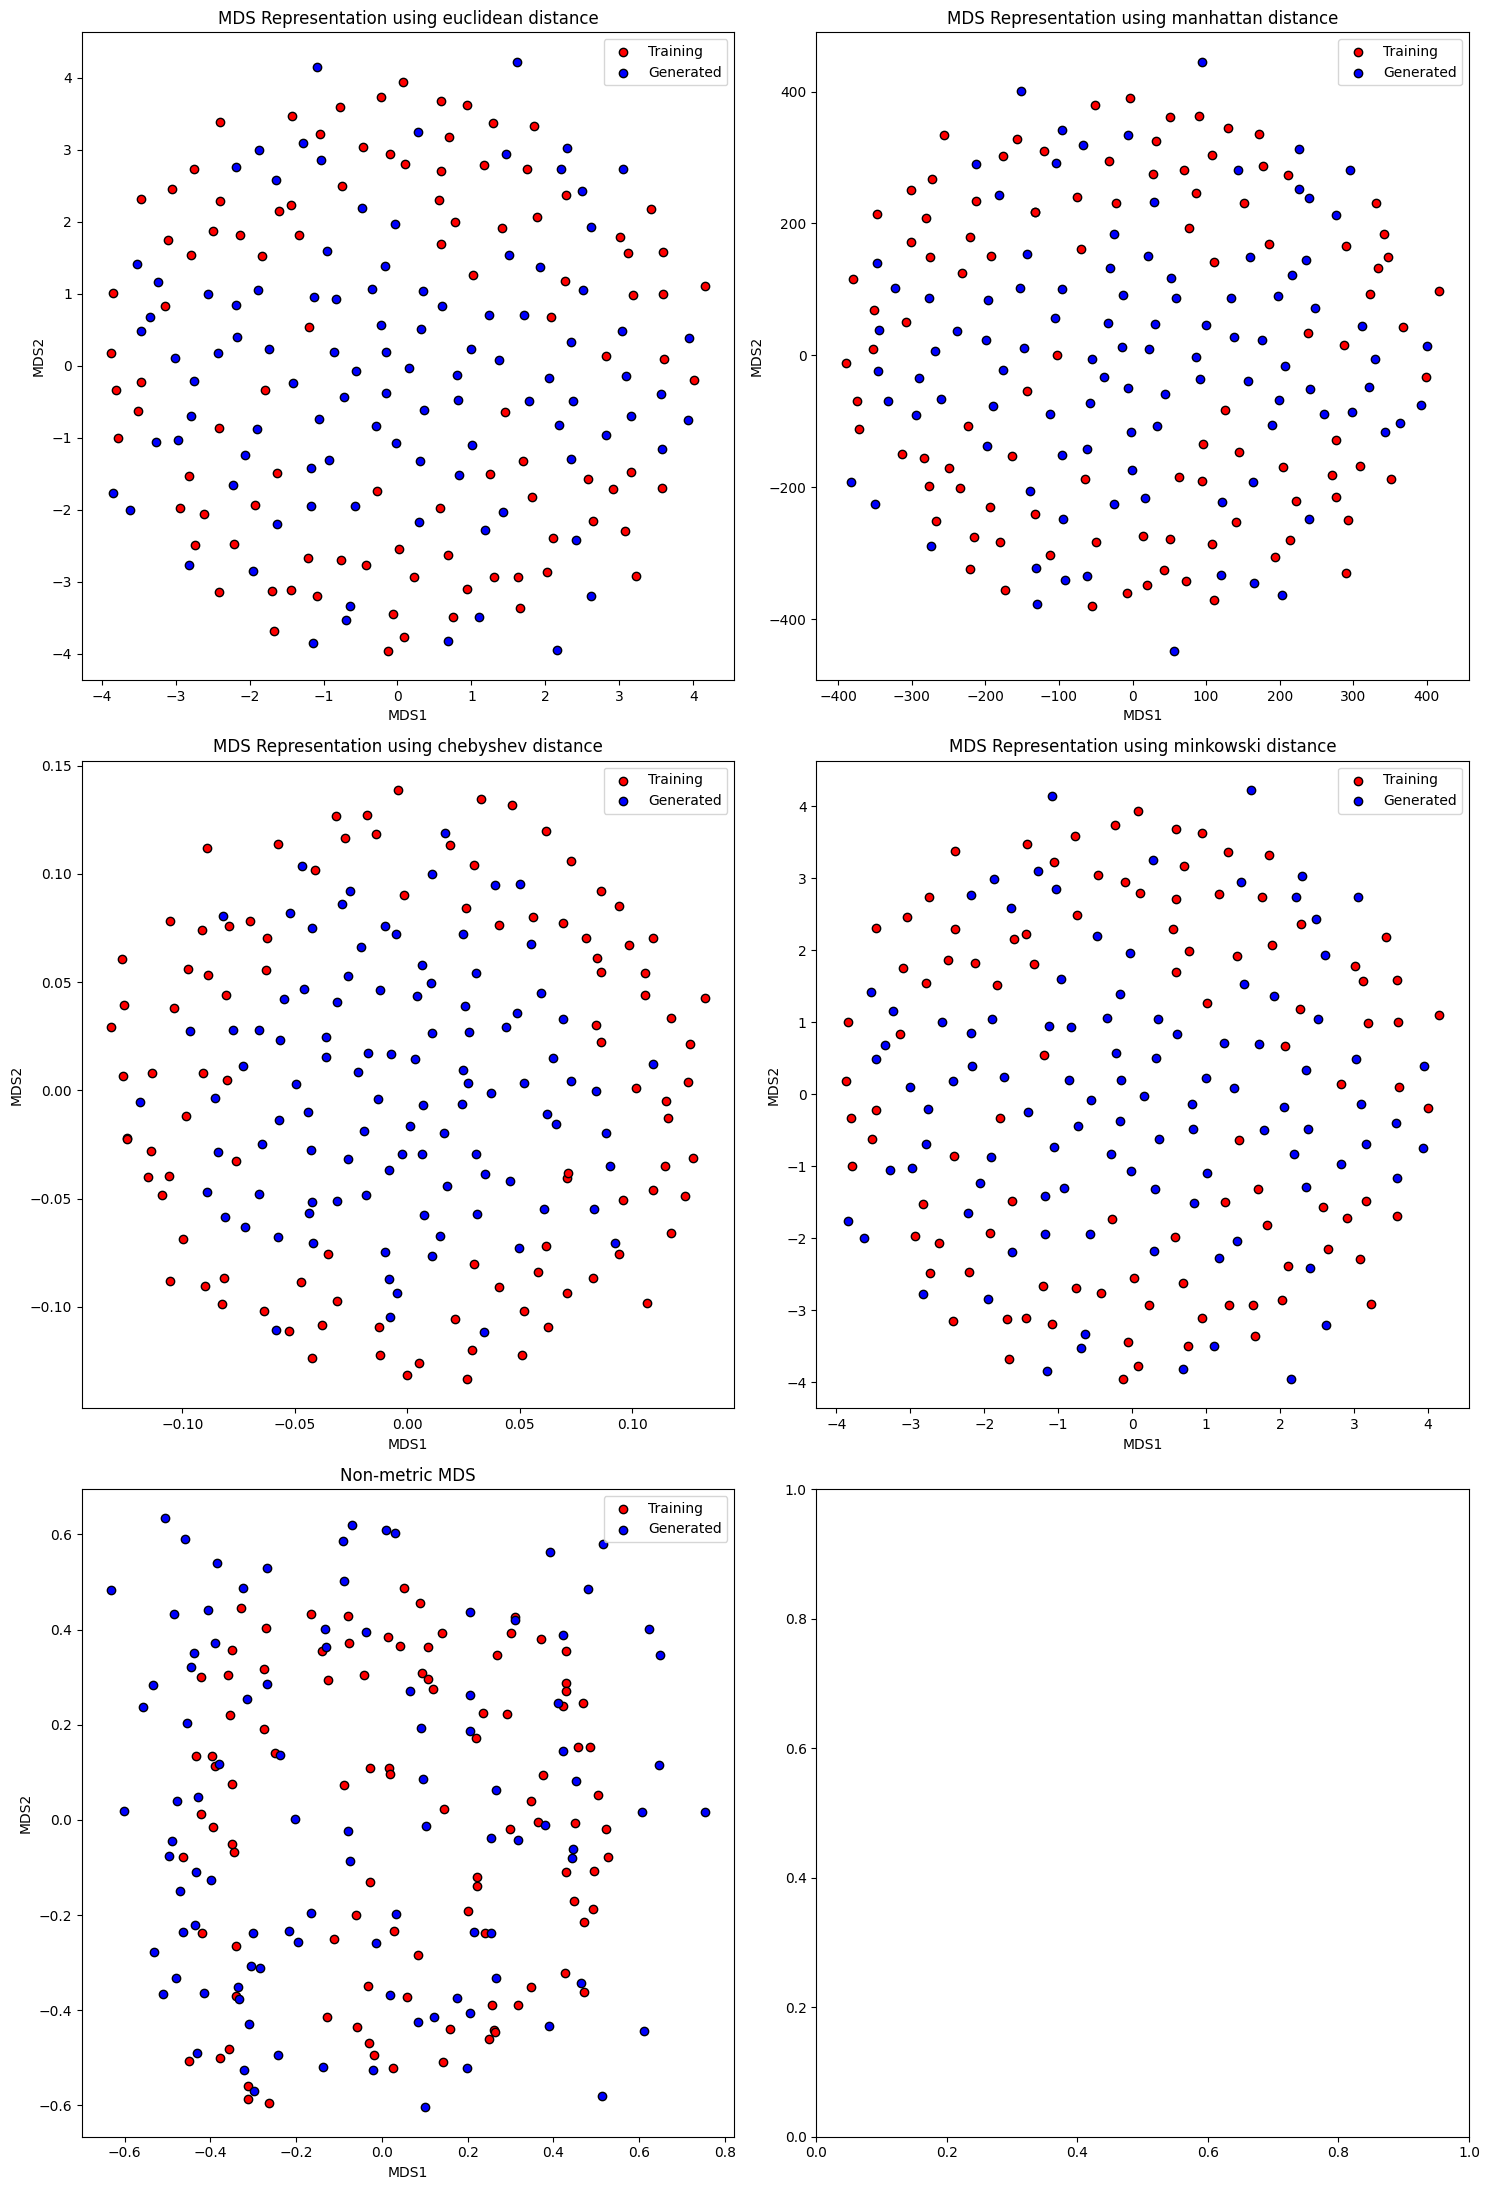

In [4]:

# Function to perform MDS and plot the result
def interactive_mds():

    # Flatten the images
    data1_flat = data1.reshape(data1.shape[0], -1)
    data2_flat = data2.reshape(data2.shape[0], -1)

    # Combine the data
    combined_data = np.vstack((data1_flat, data2_flat))

    # Setup the subplot grid
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 22))
    axes = axes.ravel()  # Flatten the array of axes

    # List of metrics to plot
    metrics_to_plot = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'non-metric']
    
    for idx, distance_metric in enumerate(metrics_to_plot):
        # Compute the dissimilarity (distance) matrix
        if distance_metric != 'non-metric':
            dissimilarity_matrix = pairwise_distances(combined_data, metric=distance_metric)
            metric_bool = True
        else:
            # For non-metric MDS, start by computing euclidean distances
            # The non-metric MDS algorithm will only use the rank order of these distances
            dissimilarity_matrix = pairwise_distances(combined_data, metric='euclidean')
            metric_bool = False

        # Initialize MDS
        mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, metric=metric_bool)

        # Fit the MDS model
        mds_transformed_data = mds.fit_transform(dissimilarity_matrix)

        # Plot the results on a subplot
        ax = axes[idx]
        ax.scatter(mds_transformed_data[:100, 0], mds_transformed_data[:100, 1], c='red', label='Training', edgecolors='k')
        ax.scatter(mds_transformed_data[100:, 0], mds_transformed_data[100:, 1], c='blue', label='Generated', edgecolors='k')
        ax.legend()
        ax.set_title(f'MDS Representation using {distance_metric} distance' if metric_bool else 'Non-metric MDS')
        ax.set_xlabel('MDS1')
        ax.set_ylabel('MDS2')

    plt.tight_layout()
    plt.show()

# Call the function to create MDS plots with different metrics
interactive_mds()


## MDS Plots Analysis

### Euclidean Distance MDS Plot
This plot preserves the "ordinary" straight-line distances between points. Clusters formed in this plot represent groups of images that are similar in terms of pixel-wise differences. If images from the two methods cluster separately, this would suggest that they have distinct pixel distributions.

### Manhattan Distance MDS Plot
The Manhattan distance might reveal different clustering patterns because it sums the absolute differences across all dimensions. It's more sensitive to variations in any single pixel value rather than the aggregate of all pixel differences. Distinct or overlapping clusters here could indicate whether the images differ mostly in single-pixel intensity changes or more global changes.

### Chebyshev Distance MDS Plot
This metric focuses on the maximum difference along any one dimension, essentially capturing the most extreme change between images. If images from the two methods show a clear separation here, it suggests that the methods differ in terms of the most extreme pixel values they generate.

### Minkowski Distance MDS Plot
The Minkowski distance is a generalization that can resemble either Euclidean or Manhattan distances depending on the parameter \( p \). This plot can either reinforce the findings from the Euclidean and Manhattan plots or provide a middle ground in terms of sensitivity to changes across all pixels.

### Non-Metric MDS Plot
Non-metric MDS attempts to preserve the rank order of the distances rather than their exact values. This plot can be particularly insightful if the scales of the distances in the original high-dimensional space are arbitrary or misleading. If the rank order of distances differs significantly from the metric plots, it suggests that the relative similarities between images are robust to changes in scale.


### Observations from MDS Plots

In the provided MDS plots, the points representing images are very similar, to the extent that distinguishing between images generated by different methods becomes challenging. This high degree of similarity across most plots suggests that the underlying features of the images are closely aligned, regardless of the generation technique employed.

A notable pattern emerges in the Chebyshev distance MDS plot, which differs from the patterns observed in the other distance metrics. Since the Chebyshev distance focuses on the maximum difference between any one dimension of the compared points, the distinct pattern here could be indicative of artifacts introduced by the deconvolution process used in the generative adversarial network (GAN). Artifacts are likely to create extreme pixel values, which would have a significant impact on the Chebyshev distance, causing the observed unique clustering pattern. This insight could be particularly important for further investigation into the GAN's deconvolution process and its optimization to reduce such artifacts.


#### Reference:
Borg, I., & Groenen, P. J. (2005). *Modern Multidimensional Scaling: Theory and Applications*. Springer Series in Statistics. Springer. ISBN 978-0-387-25150-9.

Dumoulin, V., & Visin, F. (2018). A guide to convolution arithmetic for deep learning (arXiv:1603.07285). arXiv. http://arxiv.org/abs/1603.07285




### The following is an Interactive approach to use MDS. 

In [5]:

# Function to perform MDS and plot the result
def interactive_mds(metric=True, distance_metric='euclidean'):
    # Load your data here
    # For demonstration, I'll create some random data
    data1 = np.random.rand(100, 64, 64)  # Example data1
    data2 = np.random.rand(100, 64, 64)  # Example data2

    # Flatten the images
    data1_flat = data1.reshape(data1.shape[0], -1)
    data2_flat = data2.reshape(data2.shape[0], -1)

    # Combine the data
    combined_data = np.vstack((data1_flat, data2_flat))

    # Compute the dissimilarity (distance) matrix
    dissimilarity_matrix = pairwise_distances(combined_data, metric=distance_metric if metric else 'euclidean')

    # Initialize MDS
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, metric=metric)

    # Fit the MDS model
    mds_transformed_data = mds.fit_transform(dissimilarity_matrix)

    # Clear the current figure before plotting a new one
    plt.clf()

    # Plot the results
    plt.figure(figsize=(10, 8))
    plt.scatter(mds_transformed_data[:data1.shape[0], 0], mds_transformed_data[:data1.shape[0], 1], c='red', label='Data1 Images', edgecolors='k')
    plt.scatter(mds_transformed_data[data1.shape[0]:, 0], mds_transformed_data[data1.shape[0]:, 1], c='blue', label='Data2 Images', edgecolors='k')
    plt.legend()
    plt.title('MDS Representation')
    plt.xlabel('MDS1')
    plt.ylabel('MDS2')
    plt.show()

# Create interactive widgets
metric_toggle = widgets.ToggleButtons(options=[('Metric', True), ('Non-metric', False)], description='MDS Type:')
metric_dropdown = widgets.Dropdown(options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'], description='Metric:', disabled=False)

# Display the widgets
widgets.interactive(interactive_mds, metric=metric_toggle, distance_metric=metric_dropdown)


interactive(children=(ToggleButtons(description='MDS Type:', options=(('Metric', True), ('Non-metric', False))…

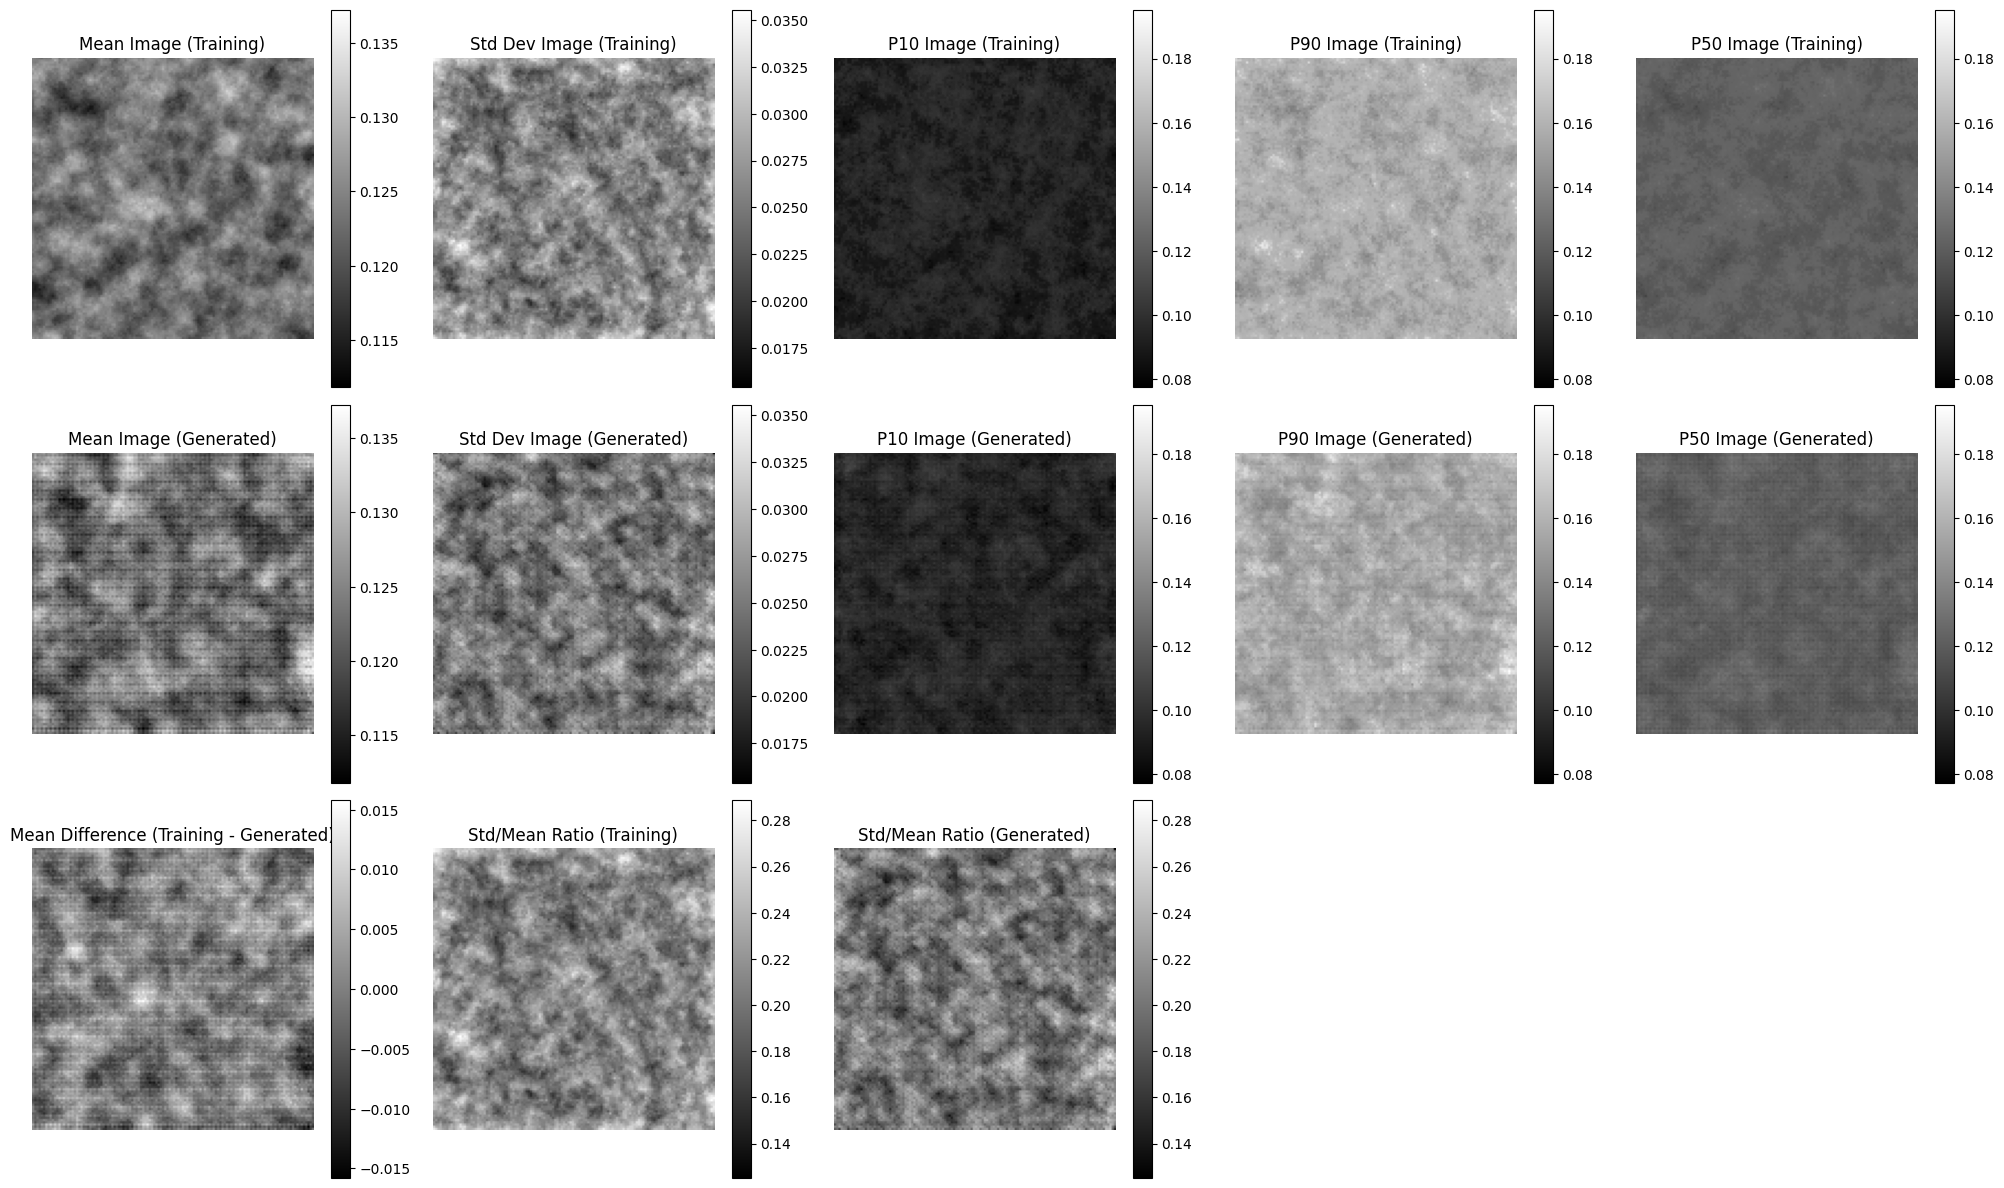

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def compute_mean_std_percentiles_image(data):
    # Calculate mean and standard deviation
    mean_image = np.mean(data, axis=0)
    std_image = np.std(data, axis=0)
    
    # Calculate percentiles
    p10_image = np.percentile(data, 10, axis=0)
    p50_image = np.percentile(data, 50, axis=0)
    p90_image = np.percentile(data, 90, axis=0)
    
    return mean_image, std_image, p10_image, p50_image, p90_image


# Compute the mean, std, and percentile images
mean_image_training, std_image_training, p10_training, p50_training, p90_training = compute_mean_std_percentiles_image(data1)
mean_image_generated, std_image_generated, p10_generated, p50_generated, p90_generated = compute_mean_std_percentiles_image(data2)

# Calculate the difference between the mean images
mean_diff = mean_image_training - mean_image_generated

# Calculate min and max for mean, std, and percentile images
mean_min = min(np.min(mean_image_training), np.min(mean_image_generated))
mean_max = max(np.max(mean_image_training), np.max(mean_image_generated))

std_min = min(np.min(std_image_training), np.min(std_image_generated))
std_max = max(np.max(std_image_training), np.max(std_image_generated))

percentile_min = min(np.min(p10_training), np.min(p10_generated), np.min(p50_training), np.min(p50_generated), np.min(p90_training), np.min(p90_generated))
percentile_max = max(np.max(p10_training), np.max(p10_generated), np.max(p50_training), np.max(p50_generated), np.max(p90_training), np.max(p90_generated))

# Calculate the range for the mean difference image
mean_diff_min = np.min(mean_diff)
mean_diff_max = np.max(mean_diff)

# Calculate the std/mean ratio images
std_mean_ratio_training = std_image_training / np.mean(mean_image_training)
std_mean_ratio_generated = std_image_generated / np.mean(mean_image_generated)

# Find min and max for the std/mean ratio images
std_mean_ratio_min = min(np.min(std_mean_ratio_training), np.min(std_mean_ratio_generated))
std_mean_ratio_max = max(np.max(std_mean_ratio_training), np.max(std_mean_ratio_generated))

# Visualization
fig, axarr = plt.subplots(3, 5, figsize=(20, 12))  # Adjust the subplot grid to 3x5

def show_image(ax, img, title, vmin, vmax, with_colorbar=False):
    im = ax.imshow(img.squeeze(), cmap='gray', vmin=vmin, vmax=vmax)  # Use squeeze to remove singleton dimensions if present
    ax.set_title(title)
    ax.axis('off')
    if with_colorbar:
        plt.colorbar(im, ax=ax)  # Add a colorbar within the same axis

# Display images with standardized color ranges
show_image(axarr[0, 0], mean_image_training, 'Mean Image (Training)', mean_min, mean_max, with_colorbar=True)
show_image(axarr[0, 1], std_image_training, 'Std Dev Image (Training)', std_min, std_max, with_colorbar=True)
show_image(axarr[0, 2], p10_training, 'P10 Image (Training)', percentile_min, percentile_max, with_colorbar=True)
show_image(axarr[0, 3], p90_training, 'P90 Image (Training)', percentile_min, percentile_max, with_colorbar=True)
show_image(axarr[0, 4], p50_training, 'P50 Image (Training)', percentile_min, percentile_max, with_colorbar=True)

show_image(axarr[1, 0], mean_image_generated, 'Mean Image (Generated)', mean_min, mean_max, with_colorbar=True)
show_image(axarr[1, 1], std_image_generated, 'Std Dev Image (Generated)', std_min, std_max, with_colorbar=True)
show_image(axarr[1, 2], p10_generated, 'P10 Image (Generated)', percentile_min, percentile_max, with_colorbar=True)
show_image(axarr[1, 3], p90_generated, 'P90 Image (Generated)', percentile_min, percentile_max, with_colorbar=True)
show_image(axarr[1, 4], p50_generated, 'P50 Image (Generated)', percentile_min, percentile_max, with_colorbar=True)

# Display the mean difference image
show_image(axarr[2, 0], mean_diff, 'Mean Difference (Training - Generated)', mean_diff_min, mean_diff_max, with_colorbar=True)

# Display the std/mean ratio images
show_image(axarr[2, 1], std_mean_ratio_training, 'Std/Mean Ratio (Training)', std_mean_ratio_min, std_mean_ratio_max, with_colorbar=True)
show_image(axarr[2, 2], std_mean_ratio_generated, 'Std/Mean Ratio (Generated)', std_mean_ratio_min, std_mean_ratio_max, with_colorbar=True)

# Leave the last two subplots empty or remove them
axarr[2, 3].axis('off')
axarr[2, 4].axis('off')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


### Remarks: 

We note similarities in the data distibution of the total average, the stadard deviation, the P10, 50, and 90. the patterns repeat and are consistent. this is mainly related to the well location that were used intially to build the model. these location has fixed data points which was inhereted in the WGAN realization when compared the original data. 


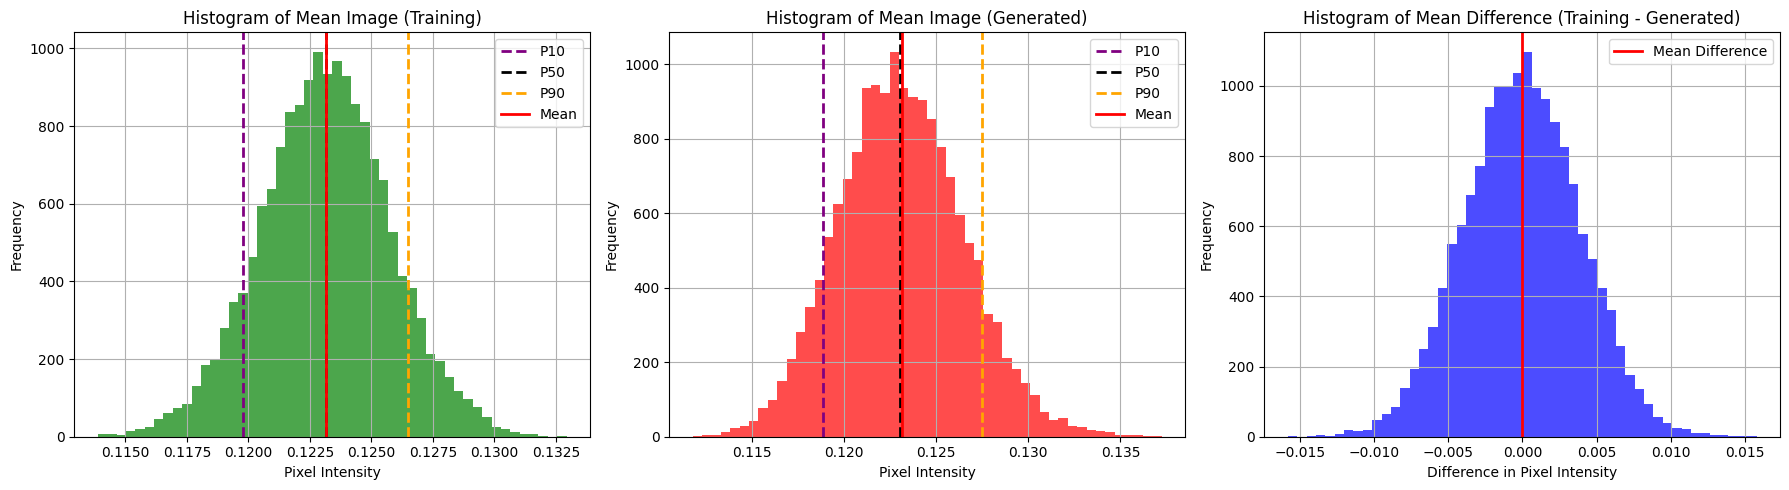

In [7]:
# Assuming mean_image_training, mean_image_generated, and mean_diff are already computed
# And also assuming p10_training, p50_training, p90_training, p10_generated, p50_generated, p90_generated are computed

# Flatten the arrays to 1D for histogram plotting
mean_image_training_flat = mean_image_training.flatten()
mean_image_generated_flat = mean_image_generated.flatten()
mean_diff_flat = mean_diff.flatten()

# Compute the percentiles and means for the flattened arrays
p10_training_flat = np.percentile(mean_image_training_flat, 10)
p50_training_flat = np.percentile(mean_image_training_flat, 50)
p90_training_flat = np.percentile(mean_image_training_flat, 90)
mean_training_flat = np.mean(mean_image_training_flat)

p10_generated_flat = np.percentile(mean_image_generated_flat, 10)
p50_generated_flat = np.percentile(mean_image_generated_flat, 50)
p90_generated_flat = np.percentile(mean_image_generated_flat, 90)
mean_generated_flat = np.mean(mean_image_generated_flat)

mean_diff_flat_mean = np.mean(mean_diff_flat)

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for Mean Image (Training)
axes[0].hist(mean_image_training_flat, bins=50, color='green', alpha=0.7)
axes[0].axvline(p10_training_flat, color='purple', linestyle='dashed', linewidth=2, label='P10')
axes[0].axvline(p50_training_flat, color='black', linestyle='dashed', linewidth=2, label='P50')
axes[0].axvline(p90_training_flat, color='orange', linestyle='dashed', linewidth=2, label='P90')
axes[0].axvline(mean_training_flat, color='red', linestyle='solid', linewidth=2, label='Mean')
axes[0].set_title('Histogram of Mean Image (Training)')
axes[0].set_xlabel('Pixel Intensity')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

# Histogram for Mean Image (Generated)
axes[1].hist(mean_image_generated_flat, bins=50, color='red', alpha=0.7)
axes[1].axvline(p10_generated_flat, color='purple', linestyle='dashed', linewidth=2, label='P10')
axes[1].axvline(p50_generated_flat, color='black', linestyle='dashed', linewidth=2, label='P50')
axes[1].axvline(p90_generated_flat, color='orange', linestyle='dashed', linewidth=2, label='P90')
axes[1].axvline(mean_generated_flat, color='red', linestyle='solid', linewidth=2, label='Mean')
axes[1].set_title('Histogram of Mean Image (Generated)')
axes[1].set_xlabel('Pixel Intensity')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)

# Histogram for Mean Difference
axes[2].hist(mean_diff_flat, bins=50, color='blue', alpha=0.7)
# For the mean difference, we only plot the mean since percentiles might not be as meaningful for a difference distribution
axes[2].axvline(mean_diff_flat_mean, color='red', linestyle='solid', linewidth=2, label='Mean Difference')
axes[2].set_title('Histogram of Mean Difference (Training - Generated)')
axes[2].set_xlabel('Difference in Pixel Intensity')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].grid(True)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [8]:


# Compute the overall mean of the mean and standard deviation images
mean_of_mean_image_generated = np.mean(mean_image_generated)
mean_of_std_image_generated = np.mean(std_image_generated)

mean_of_mean_image_training = np.mean(mean_image_training)
mean_of_std_image_training = np.mean(std_image_training)



# Compute percentile images for generated dataset
p10_image_generated = np.percentile(data1, 10, axis=0)
p50_image_generated = np.percentile(data1, 50, axis=0)
p90_image_generated = np.percentile(data1, 90, axis=0)

# Compute percentile images for training dataset
p10_image_training = np.percentile(data2, 10, axis=0)
p50_image_training = np.percentile(data2, 50, axis=0)
p90_image_training = np.percentile(data2, 90, axis=0)

# Compute the overall mean of the percentile images
mean_of_p10_image_generated = np.mean(p10_image_generated)
mean_of_p50_image_generated = np.mean(p50_image_generated)
mean_of_p90_image_generated = np.mean(p90_image_generated)

mean_of_p10_image_training = np.mean(p10_image_training)
mean_of_p50_image_training = np.mean(p50_image_training)
mean_of_p90_image_training = np.mean(p90_image_training)

# Print the results


# Prepare the data for the table
data_for_table = {
    'Dataset': ['Generated', 'Training'],
    'Mean of Mean Image': [mean_of_mean_image_generated, mean_of_mean_image_training],
    'Mean of Std Image': [mean_of_std_image_generated, mean_of_std_image_training],
    'Mean of P10 Image': [mean_of_p10_image_generated, mean_of_p10_image_training],
    'Mean of P50 Image': [mean_of_p50_image_generated, mean_of_p50_image_training],
    'Mean of P90 Image': [mean_of_p90_image_generated, mean_of_p90_image_training],
}

# Convert the data to a Pandas DataFrame
comparison_table = pd.DataFrame(data_for_table)

comparison_table


,Dataset,Mean of Mean Image,Mean of Std Image,Mean of P10 Image,Mean of P50 Image,Mean of P90 Image
0,Generated,0.123136,0.024761,0.093807,0.121404,0.156588
1,Training,0.123133,0.025995,0.095103,0.120824,0.154967


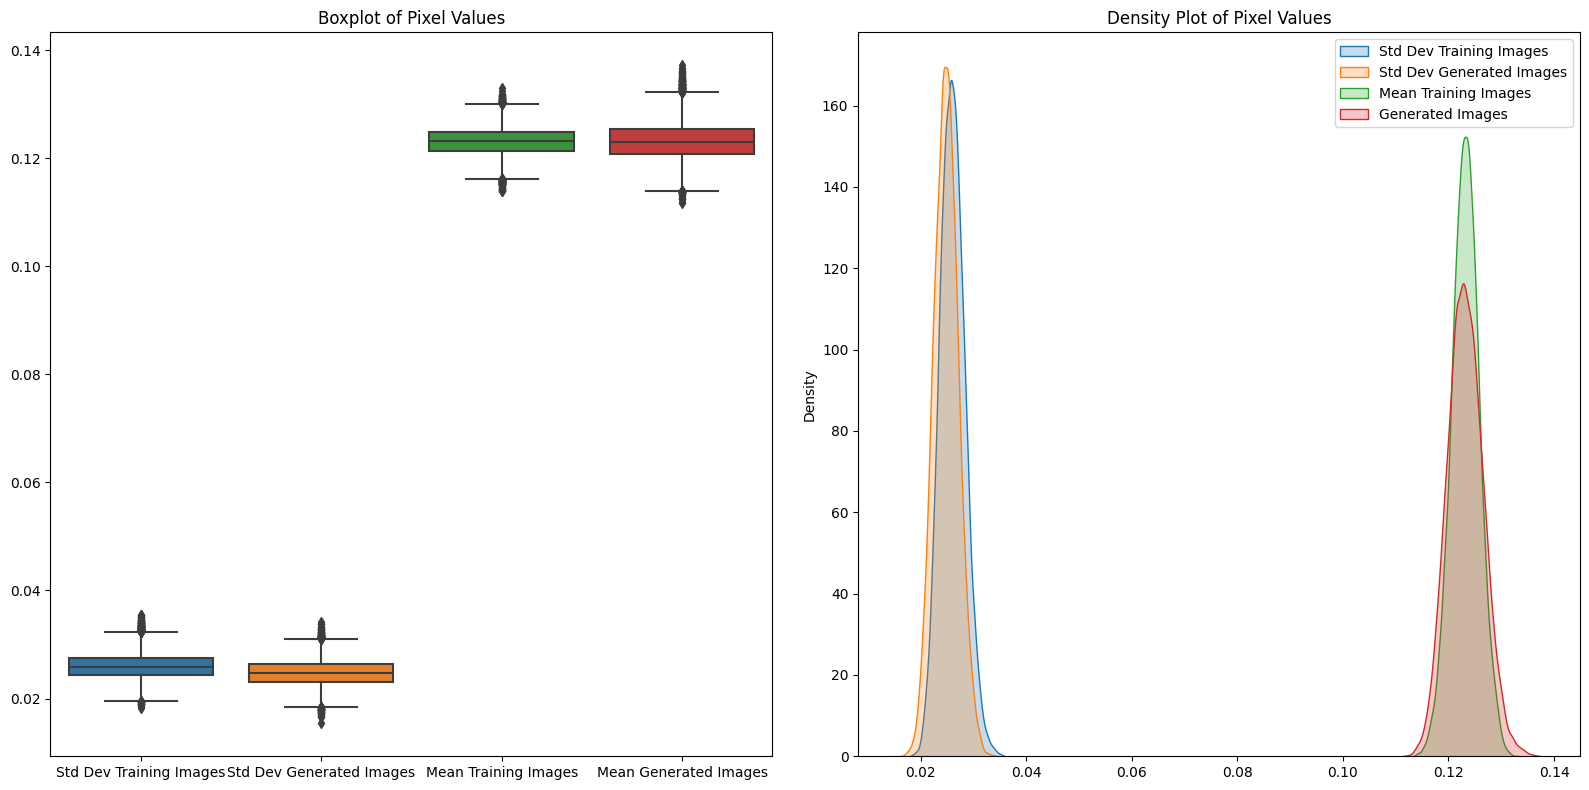

In [9]:
warnings.filterwarnings('ignore')


# Flatten the image data for the purpose of plotting
std_data1_flat = std_image_training.ravel()
std_data2_flat = std_image_generated.ravel()
mean_data1_flat = mean_image_training.ravel()
mean_data2_flat = mean_image_generated.ravel()

# Create a combined data structure for plotting with seaborn
data_for_plot = {
    'Std Dev Training Images': std_data1_flat,
    'Std Dev Generated Images': std_data2_flat,
    'Mean Training Images': mean_data1_flat,
    'Mean Generated Images': mean_data2_flat
}

# Convert to DataFrame for Seaborn
df_for_plot = pd.DataFrame(data_for_plot)

# Create a boxplot and a density plot
plt.figure(figsize=(16, 8))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df_for_plot)
plt.title('Boxplot of Pixel Values')

# Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=std_data1_flat, label='Std Dev Training Images', shade=True)
sns.kdeplot(data=std_data2_flat, label='Std Dev Generated Images', shade=True)
sns.kdeplot(data=mean_data1_flat, label='Mean Training Images', shade=True)
sns.kdeplot(data=mean_data2_flat, label='Generated Images', shade=True)
plt.title('Density Plot of Pixel Values')
plt.legend()

plt.tight_layout()
plt.show()


## UMAP: Uniform Manifold Approximation and Projection

UMAP is a modern manifold learning technique for dimension reduction, well-suited for visualizing high-dimensional data. It is comparable to t-SNE but with significant improvements in speed and scalability.

### Core Concepts of UMAP:

- **Manifold Approximation**: UMAP assumes that data is uniformly distributed on a Riemannian manifold and uses local manifold approximations to construct a high-dimensional topological representation of the data.

- **Graph Representation**: It converts data into a weighted graph, finding the `n_neighbors` nearest neighbors for each point to construct this topology.

- **Dimension Reduction**: UMAP then optimizes a low-dimensional graph to be as structurally similar as possible to the high-dimensional graph, preserving both local and global data structures.

### UMAP Hyperparameters:

- **`n_neighbors`**: Controls how UMAP balances local versus global structure, affecting the focus on either fine detail or broader data patterns.

- **`min_dist`**: Sets the minimum distance between points in the low-dimensional space, influencing the tightness of UMAP's embedding, with lower values highlighting finer cluster structures.

- **`random_state`**: Ensures consistency across multiple runs by providing a seed for the random number generator.

### Insights from the Interactive UMAP Explanation:

The [interactive visualization](https://pair-code.github.io/understanding-umap/) provides a hands-on understanding of how UMAP operates. It illustrates the effects of hyperparameters and the algorithm's sensitivity to their tuning. This tool is particularly useful for grasping the nuanced impact of `n_neighbors` and `min_dist` on the resulting embeddings.

UMAP's effectiveness in preserving data's intrinsic structure makes it highly suitable for exploratory data analysis, feature extraction, and preparing data for machine learning tasks.

#### Reference:

- McInnes, L., Healy, J., & Melville, J. (2018). UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction. arXiv preprint arXiv:1802.03426.


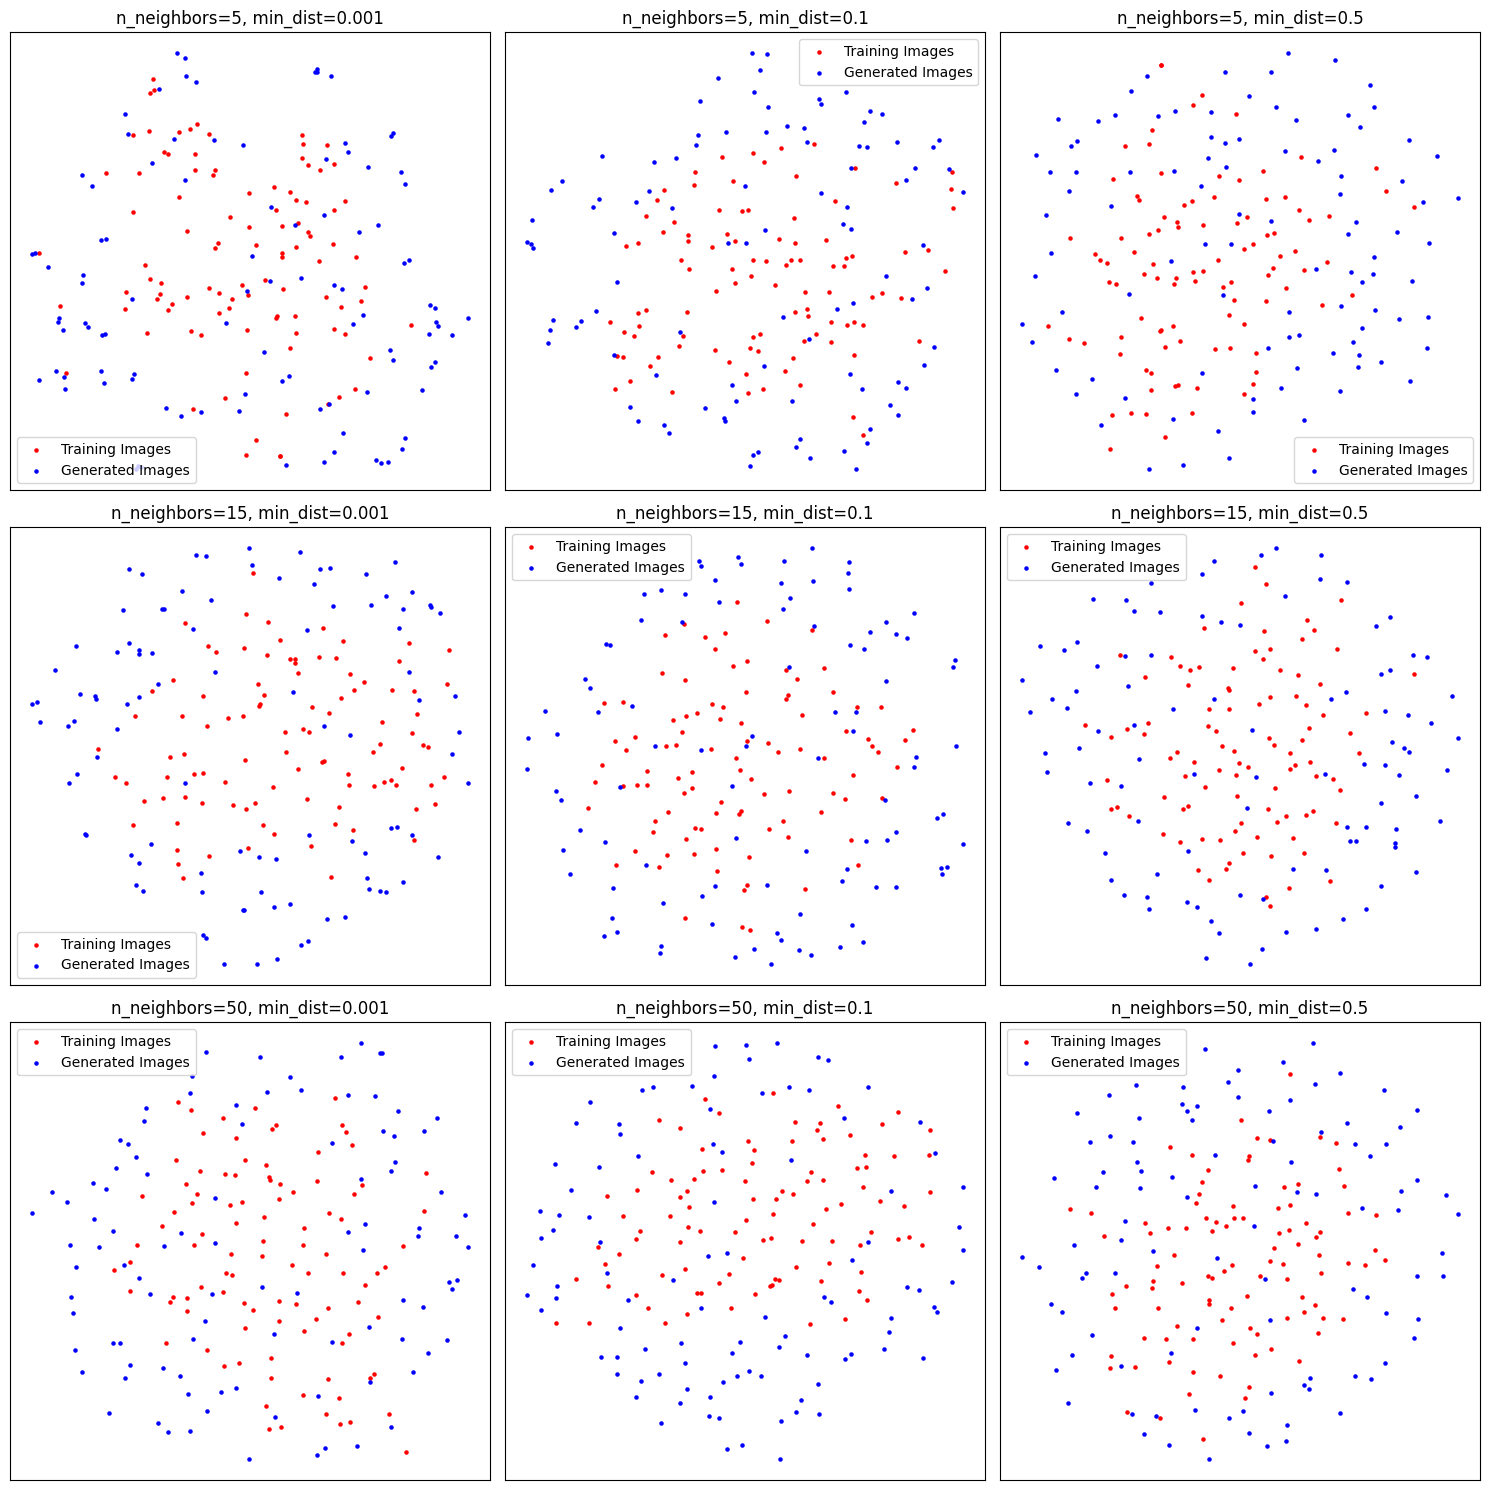

In [10]:


# Suppress warnings
warnings.filterwarnings('ignore')


# Flatten the images (UMAP expects data in a (samples, features) format)
data1_flat = data1.reshape(data1.shape[0], -1)
data2_flat = data2.reshape(data2.shape[0], -1)

# Combine the datasets
combined_data = np.vstack((data1_flat, data2_flat))

# Create numerical labels for the datasets
labels = np.array([0] * len(data1_flat) + [1] * len(data2_flat))

# Define the UMAP function for plotting
def plot_umap(n_neighbors, min_dist):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    embedding = reducer.fit_transform(combined_data)
    return embedding

# Define color map for labels
color_map = {0: 'red', 1: 'blue'}
label_map = {0: 'Training Images', 1: 'Generated Images'}

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Define the parameters for `n_neighbors` and `min_dist`
n_neighbors_options = [5, 15, 50]
min_dist_options = [0.001, 0.1, 0.5]

# Loop over all combinations of `n_neighbors` and `min_dist` and create the UMAP plots
for i, n_neighbors in enumerate(n_neighbors_options):
    for j, min_dist in enumerate(min_dist_options):
        embedding = plot_umap(n_neighbors, min_dist)
        # Plot the points and assign a label for the legend
        for label in color_map:
            indices = np.where(labels == label)
            axes[i, j].scatter(embedding[indices, 0], embedding[indices, 1], c=color_map[label], label=label_map[label], s=5)
        axes[i, j].set_title(f'n_neighbors={n_neighbors}, min_dist={min_dist}')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].legend()

plt.tight_layout()
plt.show()


In [11]:

# Create an output widget to capture the interactive plot
out = Output()

# Define the UMAP update function
def update_umap_plot(n_neighbors, min_dist):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=13)
    embedding = reducer.fit_transform(combined_data)
    
    # Plot using Matplotlib
    with out:
        out.clear_output(wait=True)  # Clear the previous plot
        plt.figure(figsize=(8, 8))
        plt.scatter(embedding[:len(data1_flat), 0], embedding[:len(data1_flat), 1], c='red', label='Training Images')
        plt.scatter(embedding[len(data1_flat):, 0], embedding[len(data1_flat):, 1], c='blue', label='Generated Images')
        plt.legend()
        plt.title(f'UMAP Projection (n_neighbors={n_neighbors}, min_dist={min_dist})')
        plt.xlabel('UMAP Component 1')
        plt.ylabel('UMAP Component 2')
        plt.grid(True)
        plt.show()

# Create interactive widgets for UMAP hyperparameters
n_neighbors_slider = IntSlider(min=2, max=50, step=1, value=15, description='n_neighbors')
min_dist_slider = FloatSlider(min=0.001, max=0.5, step=0.001, value=0.1, description='min_dist')

# Use `interactive` to create the interactive plot
interactive_plot = interactive(update_umap_plot, 
                               n_neighbors=n_neighbors_slider, 
                               min_dist=min_dist_slider)

# Display the interactive widgets and the output widget together
display(VBox([interactive_plot, out]))

# Initialize the plot with the default values
update_umap_plot(n_neighbors_slider.value, min_dist_slider.value)


## Analysis of UMAP Results with Overlapping Points

After applying UMAP to our datasets with a range of hyperparameters, we observe that the points continue to overlap significantly in the resulting two-dimensional projection. This overlap suggests a few potential interpretations regarding our data:

1. **Inherent Similarity**: The datasets might be inherently similar in the high-dimensional space, meaning the underlying features do not differ significantly between the two sets of images. This similarity could be because the GAN has learned to replicate the distribution of the training data effectively.

2. **Complex Manifold**: The manifold on which the data resides might be complex and tightly intertwined, making it difficult for UMAP to find a projection that neatly separates the points. This can occur when the differences between data points are subtle or when there is a smooth gradient of changes from one group to the other.

3. **Hyperparameter Limits**: While UMAP is highly configurable, there are limits to what hyperparameter tuning can achieve if the data does not have distinct clusters. The `n_neighbors` parameter, which influences how UMAP balances local and global data structures, and the `min_dist` parameter, which determines the compactness of UMAP's projection, may not be sufficient to separate overlapping distributions.

4. **Dimensionality Limitation**: It's also possible that a 2D projection is too limited to capture the separation present in higher dimensions. Trying a 3D projection or even analyzing clusters in higher-dimensional space using other techniques might provide additional insights.

### Conclusion

The observed overlap in UMAP projections indicates that the training and generated images have similar high-dimensional structures. This can be a sign of success in GAN's training, as it aims to replicate the training set's distribution. Alternatively, it might also suggest that the differences between the sets are too subtle to be captured in a reduced dimensionality without significant information loss.



## Introduction to Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a statistical technique used for classification and dimensionality reduction. Unlike other dimensionality reduction methods like PCA, LDA is supervised and makes use of known class labels to maximize the between-class variance and minimize the within-class variance. This results in a feature space that is optimal for separating or classifying the classes.

### Key Concepts of LDA:

- **Supervised Learning**: LDA requires class labels for the training data, as it is a supervised method. It utilizes these labels to find the directions ("linear discriminants") that will best separate the classes.

- **Maximizing Class Separability**: The goal of LDA is to project the data onto a lower-dimensional space where the classes are as distinct from each other as possible. It does so by creating axes that maximize the separation between multiple classes.

- **Dimensionality Reduction**: LDA reduces the number of features while preserving as much class discriminatory information as possible. It projects the data onto a lesser number of dimensions, which correspond to the directions with maximum class separability.

- **Assumptions**: LDA assumes that the different classes generate data based on Gaussian distributions with the same covariance matrix for all classes. It also assumes that the variables are statistically independent.

### Applications of LDA:

- **Classification**: LDA can be used as a linear classifier to determine the class of new data points.

- **Feature Extraction**: In pre-processing, LDA can be used to reduce the number of features before applying a classifier, which can be particularly beneficial in cases where there are fewer samples than dimensions (small n, large p problem).

- **Data Visualization**: By reducing the data to two or three dimensions, LDA can provide visualizations that can be helpful in understanding the data and the underlying class distributions.

LDA is especially popular in the fields of pattern recognition, machine learning, and computer vision, where understanding the separation between different classes is crucial.

# Linear Discriminant Analysis (LDA) - Mathematical Explanation

Linear Discriminant Analysis (LDA) is a statistical method for dimensionality reduction and classification. Here's a breakdown of the mathematics behind LDA.

## Mathematical Framework of LDA

### 1. Between-class Scatter Matrix \( $S_B$ \)

This matrix quantifies how far the class means are from the overall mean:

$$
S_B = \sum_{i=1}^{k} N_i (\mu_i - \mu)(\mu_i - \mu)^T
$$

Where:
- \( $N_i$ \) is the number of samples in class \( $i$ \).
- \( $\mu_i$ \) is the mean vector of class \( $i$ \).
- \( $\mu$ \) is the overall mean vector of all samples.

### 2. Within-class Scatter Matrix \( $S_W$ \)

This matrix measures the variance within each class:

$$
S_W = \sum_{i=1}^{k} \sum_{x \in class_i} (x - \mu_i)(x - \mu_i)^T
$$

### 3. Objective Function

LDA seeks to maximize the following function:

$$
J(W) = \frac{\left| W^T S_B W \right|}{\left| W^T S_W W \right|}
$$

Where \( $W$ \) is the matrix of the discriminant vectors.

### 4. Eigenvalue Problem

The problem is reduced to:

$$
S_B v = \lambda S_W v
$$

Where:
- \( $v$ \) are the eigenvectors.
- \(  $\lambda$ \)  represents the eigenvalues.

### 5. Selecting Linear Discriminants

We choose the eigenvectors with the largest eigenvalues.

### 6. Projecting onto New Axes

Finally, project the data:

$$
Y = W^T X
$$

Where:
- \( $X$ \) is the original dataset.
- \( $Y$ \) is the dataset in the reduced dimensional space.

## Steps of Calculations in LDA

1. Compute the mean vectors for each class.
2. Construct the between-class scatter matrix \( $S_B$ \) and the within-class scatter matrix \( $S_W$ \).
3. Compute the eigenvectors and corresponding eigenvalues for the matrix \( $S_W^{-1}$ $S_B$ \).
4. Sort the eigenvectors by decreasing eigenvalues and choose the top \( $k$ \) eigenvectors to form a matrix \( $W$ \), where \( $k$ \) is the number of dimensions you want to keep.
5. Project the data onto the new subspace using \( $Y$ $=$ $W^T$ $X$ \).

## Interpretation of LDA Results

- **Overlap** in the LDA projection can be seen when the projected data points of different classes are not well separated, suggesting that the eigenvectors chosen for \( $W$ \) do not fully maximize the between-class variance or that the corresponding eigenvalues are not large enough to provide complete class separability.

- **Separation** indicates that the chosen eigenvectors for \( $W$ \) result in projections with large between-class variance compared to the within-class variance, which corresponds to larger eigenvalues and thus greater class separability in the projected space.
#### Note:
LDA is closely related to Principal Component Analysis (PCA) and Factor Analysis in that they all look for linear combinations of variables which best explain the data. However, LDA explicitly attempts to model the difference between the classes of data.

By examining the eigenvalues and the form of the eigenvectors (which features contribute most to the direction of discriminants), we can determine what features are contributing to the overlap and separation in the LDA projection, thus gaining insights into the generative model's performance and the complexity of the data.


### Reference:
- Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction.* New York: Springer.


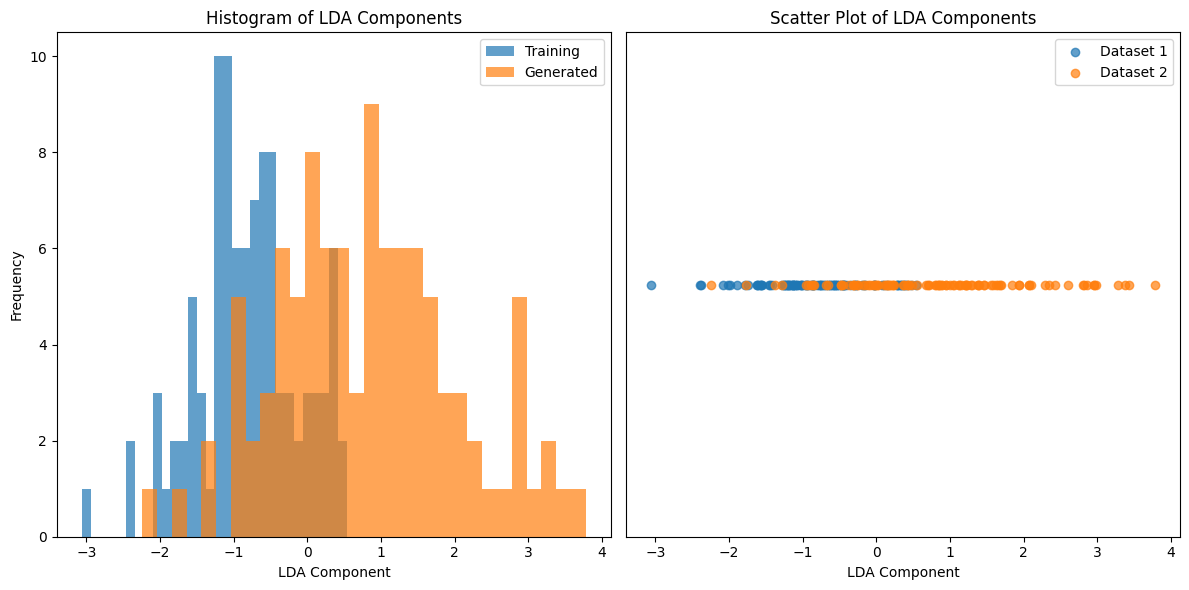

In [12]:



# Flatten the images (LDA expects data in a (samples, features) format)
data1_flat = data1.reshape(data1.shape[0], -1)
data2_flat = data2.reshape(data2.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
data1_flat = scaler.fit_transform(data1_flat)
data2_flat = scaler.transform(data2_flat)

# Create labels for the datasets (0s for the first dataset, 1s for the second)
labels = np.hstack((np.zeros(data1_flat.shape[0]), np.ones(data2_flat.shape[0])))

# Initialize LDA
lda = LDA(n_components=1)

# Fit the LDA model
lda.fit(np.vstack((data1_flat, data2_flat)), labels)

# Transform the datasets
data1_lda = lda.transform(data1_flat)
data2_lda = lda.transform(data2_flat)

# Plot the LDA results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data1_lda, bins=30, alpha=0.7, label='Training')
plt.hist(data2_lda, bins=30, alpha=0.7, label='Generated')
plt.title('Histogram of LDA Components')
plt.xlabel('LDA Component')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data1_lda, np.zeros(data1_lda.shape), alpha=0.7, label='Dataset 1')
plt.scatter(data2_lda, np.zeros(data2_lda.shape), alpha=0.7, label='Dataset 2')
plt.title('Scatter Plot of LDA Components')
plt.xlabel('LDA Component')
plt.yticks([])
plt.legend()

plt.tight_layout()
plt.show()


## Observations from Linear Discriminant Analysis (LDA)

Applying Linear Discriminant Analysis (LDA) to our datasets has yielded insightful results regarding the similarities and differences between the training images and the images generated by our model.

### Analysis of LDA Results:

- **Overlap**: The presence of overlap in the LDA projection suggests that there are aspects of the generated images that closely mirror the training data. This overlap implies that, to some extent, the generative model has successfully captured the underlying distribution of the training set.

- **Separation**: At the same time, we observe areas of clear separation in the LDA projection. This separation indicates that there are discernible differences between the training and generated images, which may be attributed to features that the generative model has not replicated perfectly.

### Interpretation:

The combined effect of overlap and separation in the LDA results points to a generative model that has partially learned the training data's structure. While it has internalized some features well enough to make the generated images resemble the training images, there are still distinct features or patterns that it has not captured, leading to separation in the LDA space.

These findings can be interpreted as follows:

- **Model Performance**: The generative model's performance is nuanced, with a certain degree of fidelity to the training data but also room for improvement in capturing its full complexity.

- **Feature Analysis**: The areas of separation might be key to understanding what features or characteristics the model is currently not replicating. Further analysis of these features could provide insights for model refinement.

- **Data Complexity**: The data's inherent complexity might be such that a simple generative model cannot capture all its nuances, suggesting a need for more complex models or architectures.

### Conclusion:

The LDA visualization serves as a diagnostic tool, revealing both the strengths and limitations of our generative model. It provides a visual summary of the model's current capabilities and highlights potential areas for future research and development.



## t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is a non-linear dimensionality reduction and visualization technique that is particularly well suited for embedding high-dimensional data into a space of two or three dimensions. It is commonly used for the visualization of high-dimensional datasets and is especially popular in the field of machine learning for exploratory data analysis.

### How t-SNE Works:

- **Neighborhood Preservation**: t-SNE starts by converting the high-dimensional Euclidean distances between points into conditional probabilities that represent similarities. The similarity of datapoint ( $x_j$ ) to datapoint ( $x_i$ ) is the conditional probability ( $p_{j|i}$ ) that ( $x_i$ ) would pick ( $x_j$ ) as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at ( $x_i$ ).

- **Low-Dimensional Mapping**: It then seeks a low-dimensional representation that preserves these neighborhood identities by minimizing the Kullback–Leibler divergence between the conditional probability distribution in the high-dimensional space and a similar conditional probability distribution in the low-dimensional space.

### Key Hyperparameters of t-SNE:

- **`perplexity`**: A parameter that reflects how to balance attention between local and global aspects of your data and can be thought of as a measure of the effective number of neighbors. Typically, it is set between 5 and 50.

- **`learning_rate`**: Controls how much the weights are adjusted at each update, with too high causing the points to form a "ball," and too low letting the points hardly move. Common values range between 10 and 1000.

- **`n_iter`**: The number of iterations used in the optimization. Sufficient iterations allow t-SNE to unfold and stabilize the embedded structure.

### Interpretation and Use Cases:

- **Clusters**: t-SNE can reveal clusters at several scales on a single map, which can be a powerful investigative tool when you are searching for inherent groupings in your data.

- **Data Exploration**: It is mostly used as an exploratory tool to see how data is arranged in high-dimensional space and can help to select features, decide on models, and even preprocess data further.

- **Caveats**: t-SNE has certain limitations, such as the perplexity dependence and the potential for different results upon different runs due to its stochastic nature. It's also computationally intensive, especially on large datasets.

t-SNE is particularly useful for insight into the structure of high-dimensional data, revealing the underlying patterns in the form of clusters and helping to identify if and how groups of points differ from each other.

#### References:

- van der Maaten, L., & Hinton, G. (2008). Visualizing Data using t-SNE. Journal of Machine Learning Research, 9(Nov), 2579-2605.


In [13]:


# Combine the datasets
combined_data = np.vstack((data1_flat, data2_flat))


# Create labels for the datasets
labels = np.array(['Dataset 1'] * len(data1_flat) + ['Dataset 2'] * len(data2_flat))

# Create an output widget to capture the interactive plot
out = Output()

# Define the t-SNE update function
def update_tsne(perplexity=30, learning_rate=200, n_iter=1000):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
    tsne_results = tsne.fit_transform(combined_data)
    
    with out:
        out.clear_output(wait=True)  # Clear the previous plot
        plt.figure(figsize=(8, 8))
        
        # Scatter plot for the first dataset
        plt.scatter(tsne_results[:len(data1_flat), 0], tsne_results[:len(data1_flat), 1], c='red', label='Training Images')
        # Scatter plot for the second dataset
        plt.scatter(tsne_results[len(data1_flat):, 0], tsne_results[len(data1_flat):, 1], c='blue', label='Generated Images')
        
        plt.legend()
        plt.title(f't-SNE visualization (perplexity={perplexity}, learning_rate={learning_rate})')
        plt.xlabel('t-SNE 1')
        plt.ylabel('t-SNE 2')
        plt.grid(True)
        plt.show()

# Create interactive sliders
perplexity_slider = IntSlider(min=5, max=50, step=5, value=30, description='Perplexity')
learning_rate_slider = FloatSlider(min=10, max=1000, step=10, value=200, description='Learning Rate')
n_iter_slider = IntSlider(min=250, max=2000, step=250, value=1000, description='Iterations')

# Use `interactive` to create the interactive plot
interactive_plot = interactive(update_tsne, 
                               perplexity=perplexity_slider, 
                               learning_rate=learning_rate_slider, 
                               n_iter=n_iter_slider)

# Display the interactive widgets and the output widget together
display(VBox([interactive_plot, out]))

# Call the update function to show the initial plot
update_tsne(perplexity_slider.value, learning_rate_slider.value, n_iter_slider.value)


# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

## Overview

- **Goal of PCA**: The primary goal of PCA is to identify the most meaningful basis to re-express a data set. This is achieved by finding the directions (principal components) that maximize the variance in a dataset.
- **Dimensionality Reduction**: Often, the first few principal components can explain the majority of the variance in the data. Thus, PCA is a powerful tool for dimensionality reduction, enabling easier visualization and processing of high-dimensional datasets.

## How PCA Works

1. **Standardization**: The data is normalized so that it has a mean of 0 and standard deviation of 1.
2. **Covariance Matrix Computation**: The covariance matrix is computed to identify correlations between different features in the data.
3. **Eigenvalue and Eigenvector Calculation**: Eigenvalues and eigenvectors of the covariance matrix are calculated. Eigenvectors determine the directions of the new feature space, and eigenvalues determine their magnitude.
4. **Sorting Eigenvectors**: Eigenvectors are sorted by the magnitude of their eigenvalues in descending order.
5. **Projection**: The original data are projected onto the new feature space (the principal components) to reduce the dimensions of the data.

## Applications of PCA

- **Data Visualization**: Reducing the number of features to 2 or 3 principal components for visualizing high-dimensional data.
- **Noise Reduction**: Eliminating components with low variance that may represent noise.
- **Feature Extraction**: Creating new features that can summarize the original data without much loss of information.

## Limitations of PCA

- **Linear Assumptions**: PCA assumes that the principal components are a linear combination of the original features.
- **Variance-based**: PCA looks to maximize variance, which may not always equate to the most important features.
- **Outliers Sensitivity**: PCA is sensitive to outliers in the data which can influence the direction of the principal components.

In practical applications, PCA can be implemented using libraries such as `scikit-learn` in Python, with methods that make it straightforward to compute and apply PCA to data.



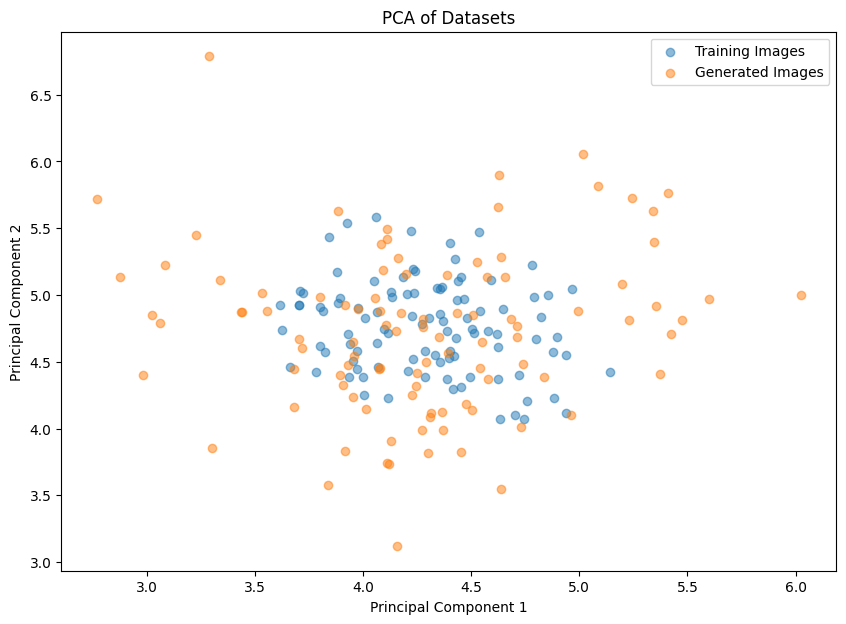

In [14]:


# Flatten the images (PCA expects data in a (samples, features) format)
data1_flat = data1.reshape(data1.shape[0], -1)
data2_flat = data2.reshape(data2.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
all_data_flat = np.vstack((data1_flat, data2_flat))
all_data_flat = scaler.fit_transform(all_data_flat)

# Initialize PCA
pca = PCA(n_components=2)  # You can also pass in 'mle' or a float between 0 and 1 to select components based on explained variance

# Fit PCA on the dataset
pca.fit(all_data_flat)



# Transform the datasets using the fitted PCA
data1_pca = pca.transform(data1_flat)
data2_pca = pca.transform(data2_flat)

# Plot the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(data1_pca[:, 0], data1_pca[:, 1], alpha=0.5, label='Training Images')
plt.scatter(data2_pca[:, 0], data2_pca[:, 1], alpha=0.5, label='Generated Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Datasets')
plt.show()


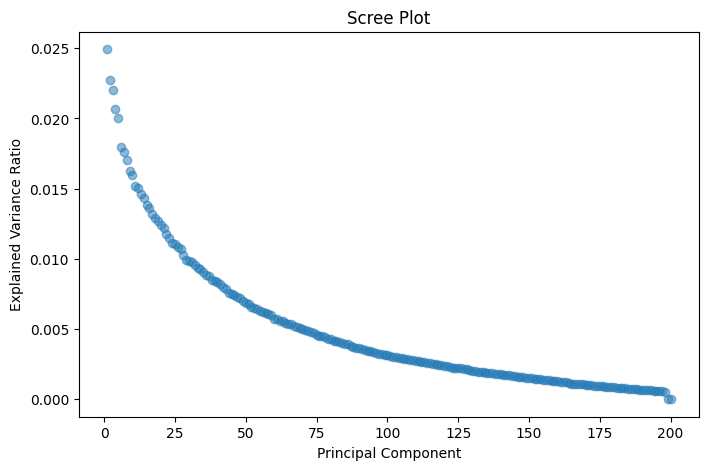

In [15]:


# Assuming data1_flat and data2_flat are already defined and flattened

# Standardize the data
scaler = StandardScaler()
all_data_flat = np.vstack((data1_flat, data2_flat))
all_data_flat = scaler.fit_transform(all_data_flat)

# Determine the maximum number of components
max_components = min(all_data_flat.shape[0], all_data_flat.shape[1], 1000)

# Initialize PCA with up to 1000 components
pca_full = PCA(n_components=max_components)

# Fit PCA on the dataset
pca_full.fit(all_data_flat)

# Calculate the explained variance ratio for the full PCA
explained_variance_ratio_full = pca_full.explained_variance_ratio_

# Create a scree plot as a scatter plot
plt.figure(figsize=(8, 5))

# Plot the explained variance ratio for each principal component as a scatter plot
plt.scatter(range(1, len(explained_variance_ratio_full) + 1), explained_variance_ratio_full, alpha=0.5, label='Individual explained variance')

# Label the axes
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')


# Add a title
plt.title('Scree Plot')

# Show the plot
plt.show()


### Remarks 

To understand better the variance changes with Principal Component, we calculate the derivative of change of the variance with Principal component to get a deflection point 

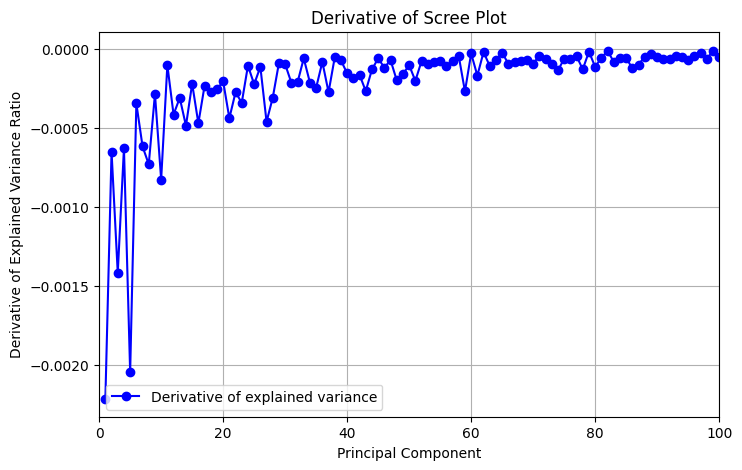

In [16]:
# Calculate the derivative of the explained variance ratio
differences = np.diff(explained_variance_ratio_full)

# Plot the derivative of the explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(differences) + 1), differences, marker='o', linestyle='-', color='blue', label='Derivative of explained variance')

# Label the axes
plt.xlabel('Principal Component')
plt.ylabel('Derivative of Explained Variance Ratio')

# Add a legend
plt.legend(loc='best')

# Add a title
plt.title('Derivative of Scree Plot')
plt.xlim(0,100)

# Show the plot with a grid for better visibility
plt.grid(True)
plt.show()




In [17]:

# Calculate the data range for both datasets separately
data1_range = np.max(data1) - np.min(data1)
data2_range = np.max(data2) - np.min(data2)

# Use the larger of the two ranges as the data range for SSIM calculation
data_range = max(data1_range, data2_range)

# Initialize matrix to hold SSIM values
ssim_matrix = np.zeros((100, 100))

# Compute SSIM between each pair of images using the determined data range
for i in range(100):
    for j in range(100):
        ssim_matrix[i, j] = ssim(data1[i], data2[j], data_range=data_range)


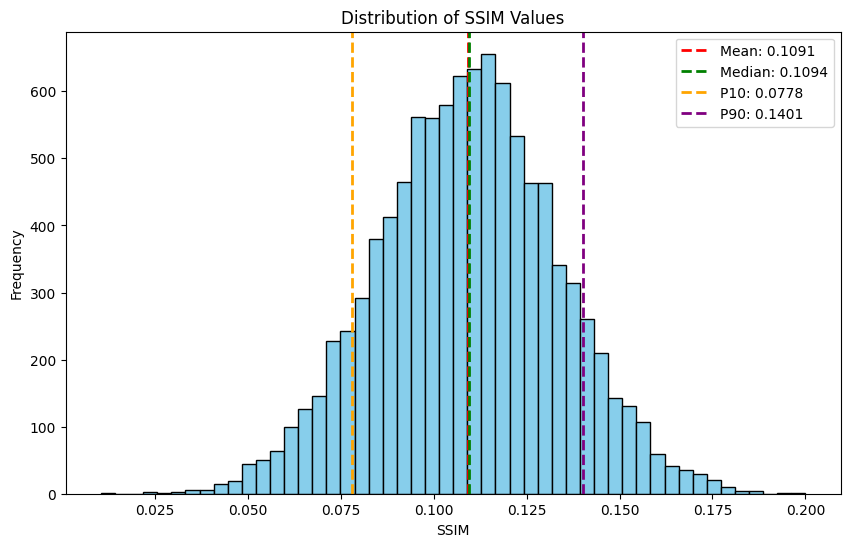

In [18]:

# Flatten the SSIM matrix to get a list of SSIM values
ssim_values = ssim_matrix.flatten()

# Calculate statistics
ssim_mean = np.mean(ssim_values)
ssim_median = np.median(ssim_values)
ssim_p10 = np.percentile(ssim_values, 10)
ssim_p90 = np.percentile(ssim_values, 90)

# Plot a histogram of the SSIM values
plt.figure(figsize=(10, 6))
plt.hist(ssim_values, bins=50, color='skyblue', edgecolor='black')
plt.axvline(ssim_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {ssim_mean:.4f}')
plt.axvline(ssim_median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {ssim_median:.4f}')
plt.axvline(ssim_p10, color='orange', linestyle='dashed', linewidth=2, label=f'P10: {ssim_p10:.4f}')
plt.axvline(ssim_p90, color='purple', linestyle='dashed', linewidth=2, label=f'P90: {ssim_p90:.4f}')
plt.title('Distribution of SSIM Values')
plt.xlabel('SSIM')
plt.ylabel('Frequency')
plt.legend()
plt.show()




In [19]:
# Initialize an array to hold the covariance values
covariances = np.zeros((100, 100))

# Compute the covariance between each pair of images
for i in range(100):
    for j in range(100):
        # Flatten the images to 1D arrays if they are not already
        img1_flat = data1[i].flatten()
        img2_flat = data2[j].flatten()

        # Calculate the covariance matrix between the two flattened images
        covariance_matrix = np.cov(img1_flat, img2_flat)

        # Extract the covariance of interest (off-diagonal element)
        covariances[i, j] = covariance_matrix[0, 1]



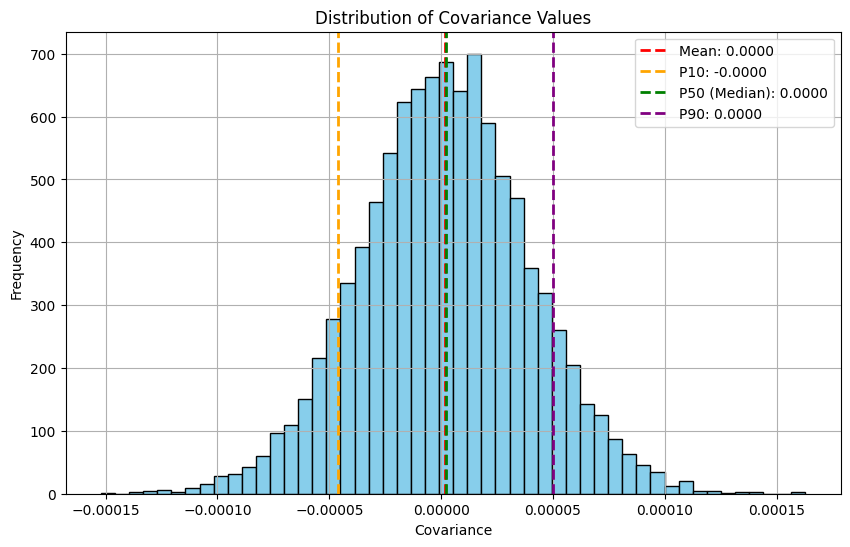

In [20]:
# Calculate statistics for the covariance values
covariance_values=covariances.flatten()
cov_mean = np.mean(covariance_values)
cov_p10 = np.percentile(covariance_values, 10)
cov_p50 = np.percentile(covariance_values, 50)  # This is also the median
cov_p90 = np.percentile(covariance_values, 90)

# Plot the histogram with statistics
plt.figure(figsize=(10, 6))
plt.hist(covariance_values, bins=50, color='skyblue', edgecolor='black')
plt.axvline(cov_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {cov_mean:.4f}')
plt.axvline(cov_p10, color='orange', linestyle='dashed', linewidth=2, label=f'P10: {cov_p10:.4f}')
plt.axvline(cov_p50, color='green', linestyle='dashed', linewidth=2, label=f'P50 (Median): {cov_p50:.4f}')
plt.axvline(cov_p90, color='purple', linestyle='dashed', linewidth=2, label=f'P90: {cov_p90:.4f}')
plt.title('Distribution of Covariance Values')
plt.xlabel('Covariance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()




## Reflecting on Image Comparison Approaches

In our quest to compare images, we have employed various methods, each with its unique strengths and perspectives. Techniques like UMAP, LDA, and t-SNE have been utilized, all while being cognizant of the ground truth of our datasets. This exploration underlines a crucial point: image comparison is a holistic endeavor that benefits greatly from a multifaceted approach.

### Holistic Analysis:

- **Comprehensive Insights**: No single method provides all the answers. Each technique may reveal different aspects of the data. For instance, UMAP might capture the global structure better, while t-SNE could excel in highlighting local patterns.

- **Ground Truth Awareness**: Knowing the ground truth enables us to gauge the effectiveness of each method. When we observe overlaps and separations in the visualizations, we can interpret these in the context of what we expect to see.

- **Multiple Perspectives**: By considering results from multiple methods, we create a more rounded view of the similarities and differences between images. Some methods may show significant overlap, suggesting similarities, while others might reveal subtle but important distinctions.

### Judgement Process:

- **Iterative Evaluation**: Image comparison is not a one-off task. It is iterative, requiring us to go back and forth, refining our models, tweaking parameters, and sometimes even revisiting our understanding of the ground truth.

- **Combination of Approaches**: A combination of dimensionality reduction, clustering, and classification techniques can lead to a more accurate and nuanced understanding. This could involve statistical analyses, deep learning models, or even human expertise.

- **Final Judgement**: The final judgement on image similarity should consider all analytical angles, including visual patterns, quantitative metrics, and the contextual understanding of the data.

### Conclusion:

The holistic process of image comparison emphasizes the importance of leveraging multiple analytical approaches to draw informed conclusions. It's a process that requires patience, critical evaluation, and an openness to the insights that different methods can provide.

